SHAIHA E K 21ME10075

In [12]:
import numpy as np

# Parameters
nx, ny = 50, 50  # Grid size
T_bottom = 100.0  # Fixed temperature on the bottom wall
T_left = 50.0  # Fixed temperature on the left wall
heat_source_value = 500.0  # Intensity of the heat source

# Initialize the temperature grid
temperature = np.zeros((ny, nx)) # 2D array of zeros

# Apply fixed boundary conditions
temperature[-1, :] = T_bottom  # Bottom wall (last row)
temperature[:, 0] = T_left  # Left wall (first column)

# Simulate the effect of the heat source (placed in the middle of the domain)
heat_source_position = (ny // 2, nx // 2) # // is integer division
temperature[heat_source_position] = heat_source_value

# Simple diffusion-like spread from the heat source (for demonstration)
for i in range(1, ny-1): # Loop over all rows (skip the first and last)
    for j in range(1, nx-1):
        if (i, j) != heat_source_position:
            temperature[i, j] = 0.25 * (temperature[i+1, j] + temperature[i-1,j] + temperature[i, j+1] + temperature[i, j-1])

# Create coordinate grids
x = np.linspace(0, 49, nx)
y = np.linspace(0, 49, ny)
x_grid, y_grid = np.meshgrid(x, y)

# Flatten the 2D arrays into 1D arrays
x_flat = x_grid.flatten()
y_flat = y_grid.flatten()
temperature_flat = temperature.flatten()

# Stack x, y, and temperature data into a single 2D array
data = np.vstack((x_flat, y_flat, temperature_flat)).T # .T is the transpose

# Save the data to a file with coordinates and temperature
np.savetxt('temperature_data_with_coordinates.txt', data,
           fmt='%.2f', header='X Y Temperature', comments='')

In [13]:
#Load the data in a separate cell/file and visualize the isotherms of temperature after generating a finer meshgrid and interpolating the data over the meshgrid.
#load file
data = np.loadtxt('temperature_data_with_coordinates.txt', skiprows=1)
x, y, temperature = data.T
# Create a finer meshgrid for visualization
x_fine = np.linspace(0, 49, 500)
y_fine = np.linspace(0, 49, 500)
X,Y = np.meshgrid(x_fine, y_fine)

## Task 2

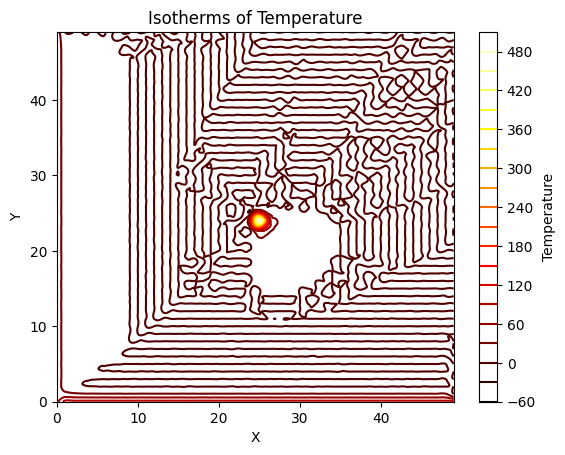

In [11]:
# Interpolate the temperature data over the finer meshgrid
from scipy.interpolate import griddata
temperature_fine = griddata((x, y), temperature, (X, Y), method='cubic')
# Plot the isotherms of temperature
import matplotlib.pyplot as plt
contour = plt.contour(X, Y, temperature_fine, levels=20, cmap='hot')
plt.colorbar(contour, label='Temperature')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Isotherms of Temperature')
plt.show()

## Task 3

In [14]:
# Assuming that the grid is uniform, use the grid spacing (delta_x and delta_y)
delta_x = X[0, 1] - X[0, 0]
delta_y = Y[1, 0] - Y[0, 0]

grad_x,grad_y = np.gradient(temperature_fine, delta_x, delta_y)

k=1
flux_x = -k*grad_x
flux_y = -k*grad_y

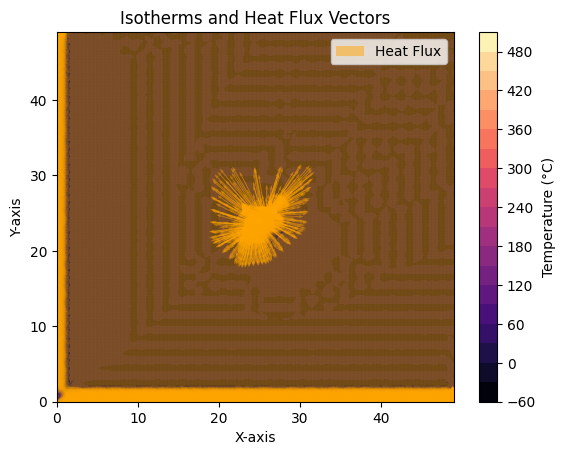

In [30]:
#Visualiasation with quiver plot
plt.figure()
contour = plt.contourf(X, Y, temperature_fine,
                       levels=20, cmap='magma')
plt.colorbar(contour, label='Temperature (°C)')

plt.quiver(X, Y, flux_x, flux_y, color='Orange', scale=None, alpha = 0.5, label='Heat Flux')

# Add labels and title for clarity
plt.title('Isotherms and Heat Flux Vectors')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
# Display the plot
plt.show()

## Task [4]: Analyze how the temperature varies along the x-direction for different fixed y-values (cut-lines).
- Choose Cut-Lines: Select different values of y (e.g., y = 0.25, y = 0.5, and y = 0.75). You can simply interpolate using appropriate values of (x,y) over the cut lines.
- Extract Temperature Profiles: For each cut-line, extract the temperature along the x-direction.
- Plot the Profiles: Plot the temperature profiles for each cut-line on the same graph for comparison.

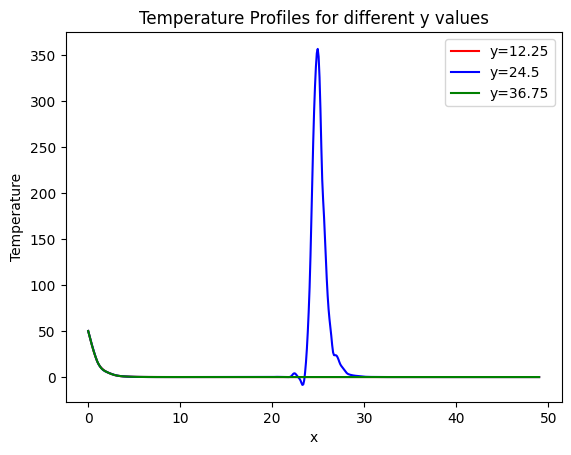

In [33]:
y_cuts = np.array([ 0.25, 0.5, 0.75]) * y_fine.max()
colors = ['r', 'b', 'g']
for y, c in zip(y_cuts, colors):
    xx, yy = np.meshgrid(x_fine, y)
    interpolated_y_temp = griddata((X.flatten(), Y.flatten(
    )), temperature_fine.flatten(), (xx, yy), method='cubic')
    plt.plot(xx.T, interpolated_y_temp.T, c, label=f'y={y}')
plt.legend()
plt.title('Temperature Profiles for different y values')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.show()